In [39]:
import pandas as pd 
import numpy as np

In [15]:
#Tried running the df but it ran into error cos it wasnt saved as utf-8
df = pd.read_csv(r'/Users/mohamedsalah/Downloads/Minimum Wage Data.csv', encoding ='latin')

# here we saved the data to utf-8
df.to_csv(r'/Users/mohamedsalah/Downloads/Minimum Wage Data.csv', encoding ='UTF-8')

df.head()

,Unnamed: 0.1,Unnamed: 0,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,0,0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.8,...,0.00000,0.00,0.00000,0.00,NaN
1,1,1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.8,2.1,2.10000,15.61,2.10000,15.61,NaN
2,2,2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.8,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,3,3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.8,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,4,4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.8,1.65(b),1.65000,12.26,1.65000,12.26,(b)


In [16]:
# create groups by unique column values. Groping state of Alabama by year. 

gb = df.groupby("State")

gb.get_group("Alabama").set_index("Year").head()

,Unnamed: 0.1,Unnamed: 0,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
Year,,,,,,,,,,,,,,,,
1968,0,0,Alabama,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
1969,54,54,Alabama,0.0,0.0,1.15,8.11,1.15,8.11,36.7,...,0.0,0.0,0.0,0.0,NaN
1970,108,108,Alabama,0.0,0.0,1.30,8.67,1.30,8.67,38.8,...,0.0,0.0,0.0,0.0,NaN
1971,162,162,Alabama,0.0,0.0,1.30,8.30,1.30,8.30,40.5,...,0.0,0.0,0.0,0.0,NaN
1972,216,216,Alabama,0.0,0.0,1.60,9.90,1.60,9.90,41.8,...,0.0,0.0,0.0,0.0,NaN


In [25]:
# Aside from grouping year by state, we are also iterating over the groups:


act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Department.Of.Labor.Cleaned.Low.Value.2020.Dollars"]].rename(columns={"Department.Of.Labor.Cleaned.Low.Value.2020.Dollars":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Department.Of.Labor.Cleaned.Low.Value.2020.Dollars"]].rename(columns={"Department.Of.Labor.Cleaned.Low.Value.2020.Dollars":name}))
act_min_wage.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.61,3.48,1.16,12.26,7.43,10.41,9.29,9.29,0.0,...,0.0,0.00,NaN,7.43,10.41,0.0,11.89,7.43,9.29,8.92
1969,0.0,14.80,3.30,1.10,11.63,7.05,9.87,8.81,8.81,0.0,...,0.0,0.00,NaN,7.05,9.87,0.0,11.28,7.05,8.81,8.46
1970,0.0,14.00,3.12,7.33,11.00,6.67,10.67,8.33,10.67,0.0,...,0.0,0.00,NaN,6.67,10.67,0.0,10.67,6.67,8.67,8.67
1971,0.0,13.41,2.99,7.03,10.54,6.39,10.22,7.98,10.22,0.0,...,0.0,0.00,NaN,6.39,10.22,0.0,10.22,6.39,8.30,8.30
1972,0.0,12.99,2.90,7.43,10.21,6.19,11.45,9.90,9.90,0.0,...,0.0,8.66,NaN,7.43,9.90,0.0,9.90,7.43,8.97,9.28


In [29]:
act_min_wage.describe().head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,53.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.0,53.000000,42.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.0,9.917736,2.917358,7.139245,9.101132,6.881698,9.212830,7.818679,8.919245,2.415283,...,0.0,5.816038,6.980238,7.079245,9.057358,6.163019,8.826038,7.486226,7.914528,5.313208
std,0.0,1.852213,4.102247,1.459132,1.418712,1.921086,1.106907,1.307834,1.932959,3.882305,...,0.0,2.240879,1.815899,0.824707,1.093119,2.749633,2.147933,0.866017,0.778113,2.004899
min,0.0,7.620000,0.000000,1.100000,6.630000,3.970000,7.040000,4.550000,5.690000,0.000000,...,0.0,0.000000,4.430000,4.950000,7.030000,0.000000,4.550000,5.770000,6.630000,2.340000
25%,0.0,8.590000,0.000000,6.780000,8.000000,5.250000,8.200000,7.320000,7.420000,0.000000,...,0.0,4.990000,5.225000,6.610000,8.060000,6.250000,7.610000,6.850000,7.320000,3.500000


In [31]:
#Another one that we can do is .corr() or .cov() to get correlation and covariance respectively
act_min_wage.corr().head()


,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,NaN,1.000000,0.037101,-0.332127,0.622245,-0.078678,0.646909,0.260265,0.271810,-0.193062,...,NaN,-0.507366,0.305388,-0.017546,0.615675,-0.593675,0.378141,0.056924,0.683108,0.726771
Arizona,NaN,0.037101,1.000000,0.271834,0.639006,0.820730,0.555455,0.477781,0.723523,0.907295,...,NaN,0.398732,-0.421255,0.413915,0.624314,0.096048,0.691863,0.663311,0.014723,0.288171
Arkansas,NaN,-0.332127,0.271834,1.000000,0.030265,0.333597,0.183662,0.107639,0.433775,0.340509,...,NaN,0.520381,0.080528,0.208586,0.236875,0.572595,0.130825,0.504703,-0.069024,-0.235369
California,NaN,0.622245,0.639006,0.030265,1.000000,0.649967,0.881831,0.518481,0.727373,0.443946,...,NaN,-0.109316,-0.061610,0.367924,0.894617,-0.216247,0.816087,0.492809,0.382444,0.598739


In [43]:
#Covariance

act_min_wage.cov().head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Alabama,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Alaska,0.0,3.430695,0.281905,-0.897615,1.635108,-0.279958,1.326310,0.630462,0.973150,-1.388278,...,0.0,-2.105865,0.555470,-0.026802,1.246550,-3.023533,1.504406,0.091309,0.984516,2.698865
Arizona,0.0,0.281905,16.828431,1.627119,3.718955,6.467983,2.522213,2.563323,5.737154,14.449737,...,0.0,3.665401,-3.475778,1.400336,2.799576,1.083391,6.096251,2.356490,0.046995,2.370086
Arkansas,0.0,-0.897615,1.627119,2.129065,0.062651,0.935113,0.296637,0.205409,1.223438,1.928912,...,0.0,1.701508,0.123928,0.251003,0.377817,2.297295,0.410020,0.637759,-0.078368,-0.688551
California,0.0,1.635108,3.718955,0.062651,2.012745,1.771465,1.384812,0.962011,1.994685,2.445198,...,0.0,-0.347532,-0.152929,0.430480,1.387392,-0.843565,2.486862,0.605479,0.422187,1.703037


In [32]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,0,0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.8,...,0.00000,0.00,0.00000,0.00,NaN
1,1,1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.8,2.1,2.10000,15.61,2.10000,15.61,NaN
2,2,2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.8,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,3,3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.8,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,4,4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.8,1.65(b),1.65000,12.26,1.65000,12.26,(b)


In [34]:
issue_df = df[df['Department.Of.Labor.Cleaned.Low.Value.2020.Dollars']==0]

issue_df.head()

,Unnamed: 0.1,Unnamed: 0,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,0,0,1968,Alabama,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
9,9,9,1968,Florida,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
10,10,10,1968,Georgia,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
14,14,14,1968,Illinois,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
16,16,16,1968,Iowa,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN


In [41]:
# grab the uniques from the state column

issue_df['State'].unique()



array(['Alabama', 'Florida', 'Georgia', 'Illinois', 'Iowa', 'Kansas',
       'Louisiana', 'Mississippi', 'Missouri', 'Montana',
       'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'Arizona'],
      dtype=object)

In [44]:
# cleaning the data and replacing all the 0 to np 
# axis 1 is for columns, axis 0 (default) is for rows
# this way we only have state with actual minimum wage and not 0
act_min_wage.replace(0, np.NaN).dropna(axis=1).corr().head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Guam,Hawaii,Idaho,...,Oregon,Pennsylvania,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.332127,0.622245,-0.078678,0.646909,0.260265,0.271810,0.787515,0.630212,0.371745,...,0.010495,0.590298,0.610099,-0.287259,-0.017546,0.615675,0.378141,0.056924,0.683108,0.726771
Arkansas,-0.332127,1.000000,0.030265,0.333597,0.183662,0.107639,0.433775,0.037006,0.324870,0.008276,...,0.399650,0.065998,0.160773,0.826094,0.208586,0.236875,0.130825,0.504703,-0.069024,-0.235369
California,0.622245,0.030265,1.000000,0.649967,0.881831,0.518481,0.727373,0.411729,0.610784,0.542006,...,0.572160,0.241669,0.816544,0.171242,0.367924,0.894617,0.816087,0.492809,0.382444,0.598739
Colorado,-0.078678,0.333597,0.649967,1.000000,0.520931,0.581162,0.798145,-0.152291,0.291995,0.436981,...,0.733803,-0.229508,0.559646,0.519677,0.538775,0.581318,0.721208,0.623479,-0.101133,0.095454
Connecticut,0.646909,0.183662,0.881831,0.520931,1.000000,0.586472,0.700081,0.587469,0.674581,0.536894,...,0.480491,0.408964,0.829952,0.228521,0.307922,0.911003,0.760697,0.484080,0.468287,0.752009


In [46]:
# check for mistakes

min_wage_corr =act_min_wage.replace(0, np.NaN).dropna(axis=1).corr().head()
for problem in issue_df['State'].unique():
    if problem in min_wage_corr.columns:
        print("Missing something here....")

In [47]:
grouped_issues = issue_df.groupby("State")

grouped_issues.get_group("Alabama").head(3)

,Unnamed: 0.1,Unnamed: 0,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,0,0,1968,Alabama,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
54,54,54,1969,Alabama,0.0,0.0,1.15,8.11,1.15,8.11,36.7,...,0.0,0.0,0.0,0.0,NaN
108,108,108,1970,Alabama,0.0,0.0,1.30,8.67,1.30,8.67,38.8,...,0.0,0.0,0.0,0.0,NaN


In [52]:
# creating viz for minimun waga correlation or covariance respectively

df = pd.read_csv(r'/Users/mohamedsalah/Downloads/Minimum Wage Data.csv')

act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Department.Of.Labor.Cleaned.Low.Value.2020.Dollars"]].rename(columns={"Department.Of.Labor.Cleaned.Low.Value.2020.Dollars":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Department.Of.Labor.Cleaned.Low.Value.2020.Dollars"]].rename(columns={"Department.Of.Labor.Cleaned.Low.Value.2020.Dollars":name}))

act_min_wage.head()

min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()

min_wage_corr.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Guam,Hawaii,Idaho,...,Oregon,Pennsylvania,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.332127,0.622245,-0.078678,0.646909,0.260265,0.271810,0.787515,0.630212,0.371745,...,0.010495,0.590298,0.610099,-0.287259,-0.017546,0.615675,0.378141,0.056924,0.683108,0.726771
Arkansas,-0.332127,1.000000,0.030265,0.333597,0.183662,0.107639,0.433775,0.037006,0.324870,0.008276,...,0.399650,0.065998,0.160773,0.826094,0.208586,0.236875,0.130825,0.504703,-0.069024,-0.235369
California,0.622245,0.030265,1.000000,0.649967,0.881831,0.518481,0.727373,0.411729,0.610784,0.542006,...,0.572160,0.241669,0.816544,0.171242,0.367924,0.894617,0.816087,0.492809,0.382444,0.598739
Colorado,-0.078678,0.333597,0.649967,1.000000,0.520931,0.581162,0.798145,-0.152291,0.291995,0.436981,...,0.733803,-0.229508,0.559646,0.519677,0.538775,0.581318,0.721208,0.623479,-0.101133,0.095454
Connecticut,0.646909,0.183662,0.881831,0.520931,1.000000,0.586472,0.700081,0.587469,0.674581,0.536894,...,0.480491,0.408964,0.829952,0.228521,0.307922,0.911003,0.760697,0.484080,0.468287,0.752009


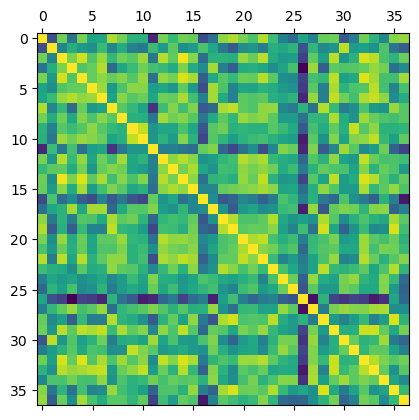

In [53]:
# creating correlation

import matplotlib.pyplot as plt

plt.matshow(min_wage_corr)
plt.show()

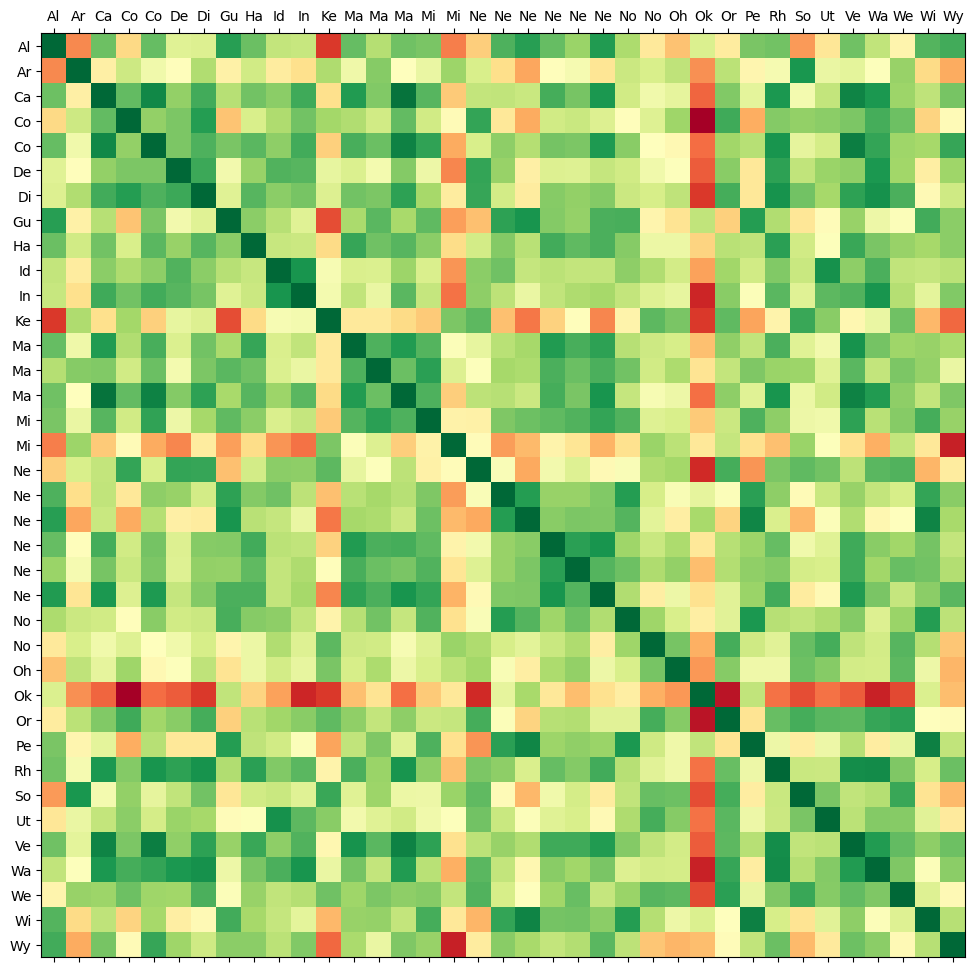

In [55]:
# Customization
labels = [c[:2] for c in min_wage_corr.columns]  # get abbv state names.

fig = plt.figure(figsize=(12,12))  # figure so we can add axis
ax = fig.add_subplot(111)  # define axis, so we can modify

ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)  # display the matrix

ax.set_xticks(np.arange(len(labels)))  # show them all!
ax.set_yticks(np.arange(len(labels)))  # show them all!

ax.set_xticklabels(labels)  # set to be the abbv (vs useless #)
ax.set_yticklabels(labels)  # set to be the abbv (vs useless #)

plt.show()

In [56]:
# Am using this website to get all the state names and the first 2 letters of every state becouse 
# The graph above is not verifying the state names as expected for example Alabama and Alaska the both
# have similar first 2 letters etc.

import requests

web = requests.get("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")
dfs = pd.read_html(web.text)


import pandas as pd

# https://www.infoplease.com/state-abbreviations-and-state-postal-codes

dfs = pd.read_html("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")

In [57]:
# one is states, the other territory
for df in dfs:
    print(df.head()) 

  State Name/District Postal Abbreviation Postal Code
0             Alabama                Ala.          AL
1              Alaska              Alaska          AK
2             Arizona               Ariz.          AZ
3            Arkansas                Ark.          AR
4          California              Calif.          CA
        Territory/Associate Abbreviation Postal Code
0            American Samoa          NaN          AS
1                      Guam         Guam          GU
2          Marshall Islands          NaN          MH
3                Micronesia          NaN          FM
4  Northern Mariana Islands          NaN          MP


In [62]:
state_abbv = dfs[0]

state_abbv.head()

,State Name/District,Postal Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [83]:
# Now am saving the state_abbv dataset in my computer
state_abbv.to_csv(r'/Users/mohamedsalah/Downloads/state_abbv.csv',index = False)


In [143]:
state_abbv = pd.read_csv(r'/Users/mohamedsalah/Downloads/state_abbv.csv')
state_abbv.head()

,State Name/District,Postal Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [142]:
abbv_dict = state_abbv[["Postal Code"]].to_dict()

abbv_dict = abbv_dict ["Postal Code"]
abbv_dict

{0: 'AL',
 1: 'AK',
 2: 'AZ',
 3: 'AR',
 4: 'CA',
 5: 'CO',
 6: 'CT',
 7: 'DE',
 8: 'DC',
 9: 'FL',
 10: 'GA',
 11: 'HI',
 12: 'ID',
 13: 'IL',
 14: 'IN',
 15: 'IA',
 16: 'KS',
 17: 'KY',
 18: 'LA',
 19: 'ME',
 20: 'MD',
 21: 'MA',
 22: 'MI',
 23: 'MN',
 24: 'MS',
 25: 'MO',
 26: 'MT',
 27: 'NE',
 28: 'NV',
 29: 'NH',
 30: 'NJ',
 31: 'NM',
 32: 'NY',
 33: 'NC',
 34: 'ND',
 35: 'OH',
 36: 'OK',
 37: 'OR',
 38: 'PA',
 39: 'RI',
 40: 'SC',
 41: 'SD',
 42: 'TN',
 43: 'TX',
 44: 'UT',
 45: 'VT',
 46: 'VA',
 47: 'WA',
 48: 'WV',
 49: 'WI',
 50: 'WY'}

In [145]:
abbv_dict = state_abbv.to_dict()

abbv_dict

{'State Name/District': {0: 'Alabama',
  1: 'Alaska',
  2: 'Arizona',
  3: 'Arkansas',
  4: 'California',
  5: 'Colorado',
  6: 'Connecticut',
  7: 'Delaware',
  8: 'District of Columbia',
  9: 'Florida',
  10: 'Georgia',
  11: 'Hawaii',
  12: 'Idaho',
  13: 'Illinois',
  14: 'Indiana',
  15: 'Iowa',
  16: 'Kansas',
  17: 'Kentucky',
  18: 'Louisiana',
  19: 'Maine',
  20: 'Maryland',
  21: 'Massachusetts',
  22: 'Michigan',
  23: 'Minnesota',
  24: 'Mississippi',
  25: 'Missouri',
  26: 'Montana',
  27: 'Nebraska',
  28: 'Nevada',
  29: 'New Hampshire',
  30: 'New Jersey',
  31: 'New Mexico',
  32: 'New York',
  33: 'North Carolina',
  34: 'North Dakota',
  35: 'Ohio',
  36: 'Oklahoma',
  37: 'Oregon',
  38: 'Pennsylvania',
  39: 'Rhode Island',
  40: 'South Carolina',
  41: 'South Dakota',
  42: 'Tennessee',
  43: 'Texas',
  44: 'Utah',
  45: 'Vermont',
  46: 'Virginia',
  47: 'Washington',
  48: 'West Virginia',
  49: 'Wisconsin',
  50: 'Wyoming'},
 'Postal Abbreviation': {0: 'Ala.'

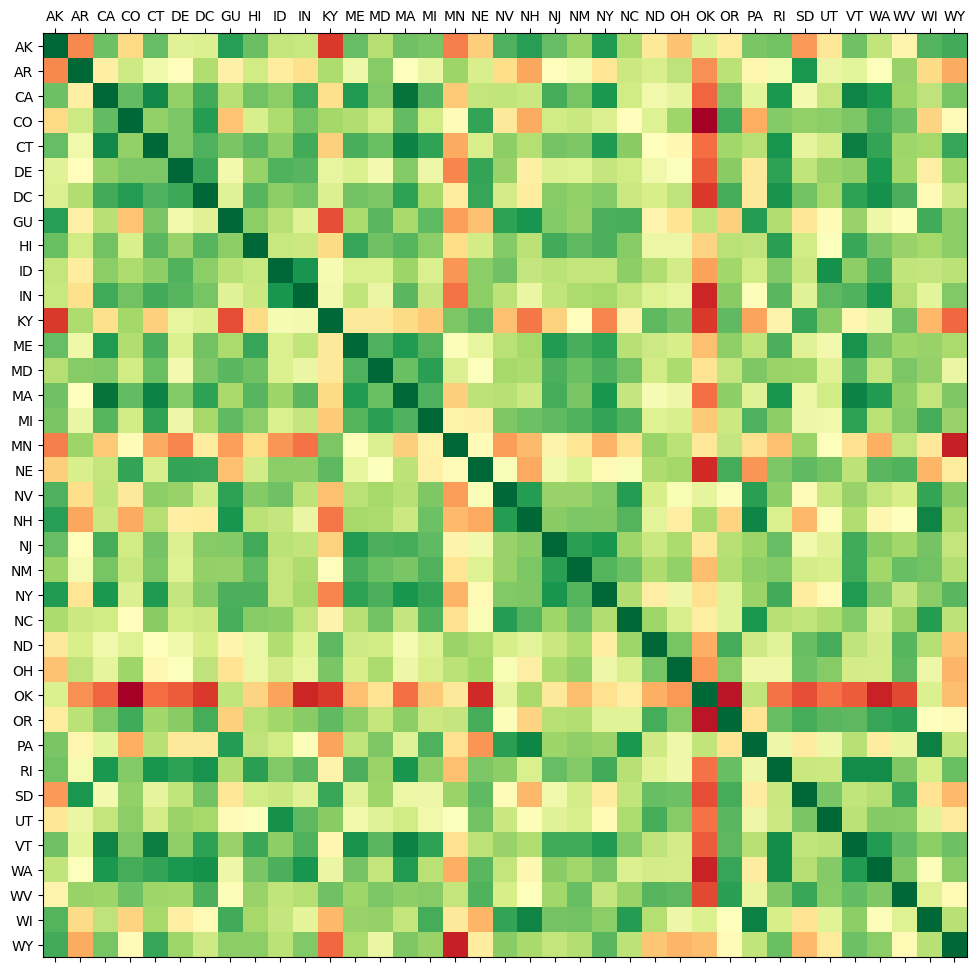

In [140]:
# Now you can see all the state correlation with their unique postal codes

abbv_dict['Guam'] = "GU"
abbv_dict['Puerto Rico'] = "PR"
abbv_dict['Alaska'] = "AK"
abbv_dict['Arkansas'] = "AR"
abbv_dict['California'] = "CA"
abbv_dict['Colorado'] = "CO"
abbv_dict['Connecticut'] = "CT"
abbv_dict['Delaware'] = "DE"
abbv_dict['District of Columbia'] = "DC"
abbv_dict['Hawaii'] = "HI"
abbv_dict['Idaho'] = "ID"
abbv_dict['Indiana'] = "IN"
abbv_dict['Kentucky'] = "KY"
abbv_dict['Maine'] = "ME"
abbv_dict['Maryland'] = "MD"
abbv_dict['Massachusetts'] = "MA"
abbv_dict['Michigan'] = "MI"
abbv_dict['Minnesota'] = "MN"
abbv_dict['Nebraska'] = "NE"
abbv_dict['Nevada'] = "NV"
abbv_dict['New Hampshire'] = "NH"
abbv_dict['New Jersey'] = "NJ"
abbv_dict['New Mexico'] = "NM"
abbv_dict['New York'] = "NY"
abbv_dict['North Carolina'] = "NC"
abbv_dict['North Dakota'] = "ND"
abbv_dict['Ohio'] = "OH"
abbv_dict['Oklahoma'] = "OK"
abbv_dict['Oregon'] = "OR"
abbv_dict['Pennsylvania'] = "PA"
abbv_dict['Rhode Island'] = "RI"
abbv_dict['South Dakota'] = "SD"
abbv_dict['Utah'] = "UT"
abbv_dict['Vermont'] = "VT"
abbv_dict['Washington'] = "WA"
abbv_dict['West Virginia'] = "WV"
abbv_dict['Wisconsin'] = "WI"
abbv_dict['Wyoming'] = "WY"



labels = [abbv_dict[c] for c in min_wage_corr.columns]  # get abbv state names.

fig = plt.figure(figsize=(12,12))  # figure so we can add axis

ax = fig.add_subplot(111)  # define axis, so we can modify
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)  # display the matrix

ax.set_xticks(np.arange(len(labels)))  # show them all!
ax.set_yticks(np.arange(len(labels)))  # show them all!
ax.set_xticklabels(labels)  # set to be the abbv (vs useless #)
ax.set_yticklabels(labels)  # set to be the abbv (vs useless #)

plt.show()
